In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
random_state = 42

import python_code.Scripts as sc
import python_code.Reference as ref
import pickle

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,precision_score
from treeinterpreter import treeinterpreter as ti
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("./data/final.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HWGT      3904 non-null   float64
 1   FSNETINC  3904 non-null   float64
 2   RAWERND   3904 non-null   float64
 3   TANF_IND  3904 non-null   float64
 4   FSSSI     3904 non-null   float64
 5   FSUSIZE   3904 non-null   float64
 6   FSGRINC   3904 non-null   float64
 7   FSGA      3904 non-null   float64
 8   FSNELDER  3904 non-null   float64
 9   FSSTDDE2  3904 non-null   float64
 10  FSTOTDED  3904 non-null   float64
 11  FSDIS     3904 non-null   float64
 12  FSERNDED  3904 non-null   float64
 13  REALPROP  3904 non-null   float64
 14  FSTANF    3904 non-null   float64
 15  SHELDED   3904 non-null   float64
 16  CERTHHSZ  3904 non-null   float64
 17  FSWAGES   3904 non-null   float64
 18  FSERNDE2  3904 non-null   float64
 19  RAWNET    3904 non-null   float64
 20  FSNONCIT  3904 non-null   floa

In [4]:
X = df.drop(columns = ['CAT_ELIG'])
y = df['CAT_ELIG']

In [5]:
#baseline, NULL Model
y.value_counts(normalize=True)

CAT_ELIG
1.0    0.662398
0.0    0.337602
Name: proportion, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=random_state)

In [7]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [8]:
np.savetxt('./data/TrainTest/X_train.csv',X_train,delimiter=',')
np.savetxt('./data/TrainTest/y_train.csv',y_train,delimiter=',')
np.savetxt('./data/TrainTest/X_test.csv',X_test,delimiter=',')
np.savetxt('./data/TrainTest/y_test.csv',y_test,delimiter=',')

In [9]:
pca = PCA(n_components=10,random_state=42)
pca.fit(X_train)
X_train_pc = pca.transform(X_train)
X_test_pc = pca.transform(X_test)

In [10]:
models = {
    'LogReg': LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Gradient Boost':GradientBoostingClassifier(),
    'Ada Boost':AdaBoostClassifier(),
    'SVC':SVC(),
    'Naive Bayes':GaussianNB()}

In [11]:
#adapted from Dan Brown lecture
final = pd.DataFrame(columns=['name', 'cross_val_train', 'cross_val_test', 'test_recall', 'test_precision'])

idx = 0
while idx < len(models.keys()):
    for name, model in models.items():
        results = {}
        results['name'] = name
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        results['cross_val_train'] = np.mean(cross_val_score(model, X_train, y_train, cv=4))
        results['cross_val_test'] = np.mean(cross_val_score(model, X_test, y_test, cv=4))
        results['test_recall'] = recall_score(y_test, y_pred_test)
        results['test_precision'] = precision_score(y_test, y_pred_test)
        
        # Convert results to a DataFrame and append using pd.concat
        results_df = pd.DataFrame([results])
        final = pd.concat([final, results_df], ignore_index=True)
        
        idx += 1

In [12]:
final.set_index('name')

,cross_val_train,cross_val_test,test_recall,test_precision
name,,,,
LogReg,0.884334,0.862628,0.900262,0.903821
Decision Tree,0.903001,0.910410,0.931759,0.939153
Random Forest,0.942533,0.934300,0.965879,0.954604
Gradient Boost,0.940703,0.933447,0.950131,0.960212
Ada Boost,0.922035,0.920648,0.937008,0.939474
SVC,0.884700,0.854949,0.901575,0.928378
Naive Bayes,0.767204,0.741468,0.833333,0.908441


In [13]:
for name,model in models.items():
    name = model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred_test))
    print('\n')

LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       410
         1.0       0.90      0.90      0.90       762

    accuracy                           0.87      1172
   macro avg       0.86      0.86      0.86      1172
weighted avg       0.87      0.87      0.87      1172



DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       410
         1.0       0.95      0.93      0.94       762

    accuracy                           0.92      1172
   macro avg       0.91      0.92      0.92      1172
weighted avg       0.92      0.92      0.92      1172



RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       410
         1.0       0.96      0.96      0.96       762

    accuracy                           0.95      1172
   macro avg       0.94      0.94      0.94      1172

In [14]:
rf = RandomForestClassifier()
params={'max_depth':[None,3,4],
       'max_features':[None,'auto'],
       'n_estimators':[75,100,125]}
rf_gs = GridSearchCV(rf,param_grid=params)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
rf_gs.best_params_

C:\Users\pmanc\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pmanc\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pmanc\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\pmanc\A

0.9374034862151863


{'max_depth': None, 'max_features': None, 'n_estimators': 125}

In [15]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
instances = X_test[[735]]
instances

array([[-0.51614194, -0.8826584 , -0.59885312, -0.36488324, -0.42833737,
         1.02614408, -1.25472977, -0.1335093 , -0.40909055, -1.59315573,
         0.39411313, -0.51403261, -0.59758589, -0.03517855, -0.34230342,
         1.00652396,  1.02614408, -0.55893964, -0.56404251, -0.88061189,
         1.78070948, -0.24309398, -1.28640995,  1.0459183 , -0.24501332,
        -0.76825854, -0.91848291, -0.87253073, -0.59800159, -1.49056789,
        -0.02833014, -0.35352552]])

In [17]:
ft_list = []
prediction, bias, contributions = ti.predict(rf, instances)
print( "Prediction", prediction)
print( "Bias (trainset prior)", bias)
print ("Feature contributions:")
for c, feature in zip(contributions[0], 
                             X.columns):
    ft_list.append((feature, np.round(c, 2)))
    print (feature, c)
    
labels, values = zip(*ft_list)

Prediction [[0.74 0.26]]
Bias (trainset prior) [[0.33183016 0.66816984]]
Feature contributions:
HWGT [ 0.06588206 -0.06588206]
FSNETINC [-0.00488276  0.00488276]
RAWERND [-0.00322587  0.00322587]
TANF_IND [ 0.02447002 -0.02447002]
FSSSI [ 0.01521489 -0.01521489]
FSUSIZE [ 0.03969966 -0.03969966]
FSGRINC [ 0.00251158 -0.00251158]
FSGA [ 0.00443634 -0.00443634]
FSNELDER [-0.00417523  0.00417523]
FSSTDDE2 [ 0.03852516 -0.03852516]
FSTOTDED [-0.00359035  0.00359035]
FSDIS [-0.00126127  0.00126127]
FSERNDED [-0.01511667  0.01511667]
REALPROP [0. 0.]
FSTANF [ 0.01733083 -0.01733083]
SHELDED [ 0.09261667 -0.09261667]
CERTHHSZ [ 0.03212958 -0.03212958]
FSWAGES [-0.00363672  0.00363672]
FSERNDE2 [-0.00390189  0.00390189]
RAWNET [ 0.00074598 -0.00074598]
FSNONCIT [ 0.03590714 -0.03590714]
FSASSET [-0.02631156  0.02631156]
FSTOTDE2 [ 0.0049951 -0.0049951]
FSSLTDED [ 0.09863748 -0.09863748]
LIQRESOR [-0.02622604  0.02622604]
WRK_POOR [-0.00805098  0.00805098]
FSUNEARN [ 0.03372248 -0.03372248]
FSS

In [18]:
df1 = pd.DataFrame(ft_list,columns=['feature','array'])
df2 = pd.DataFrame(df1["array"].to_list(), columns=['pred_0', 'pred_1'])
coef_df = pd.concat([df1,df2],axis=1).drop(columns=['array'])
coef_df.to_csv('./data/2018_indicators/coef.csv',index=None)

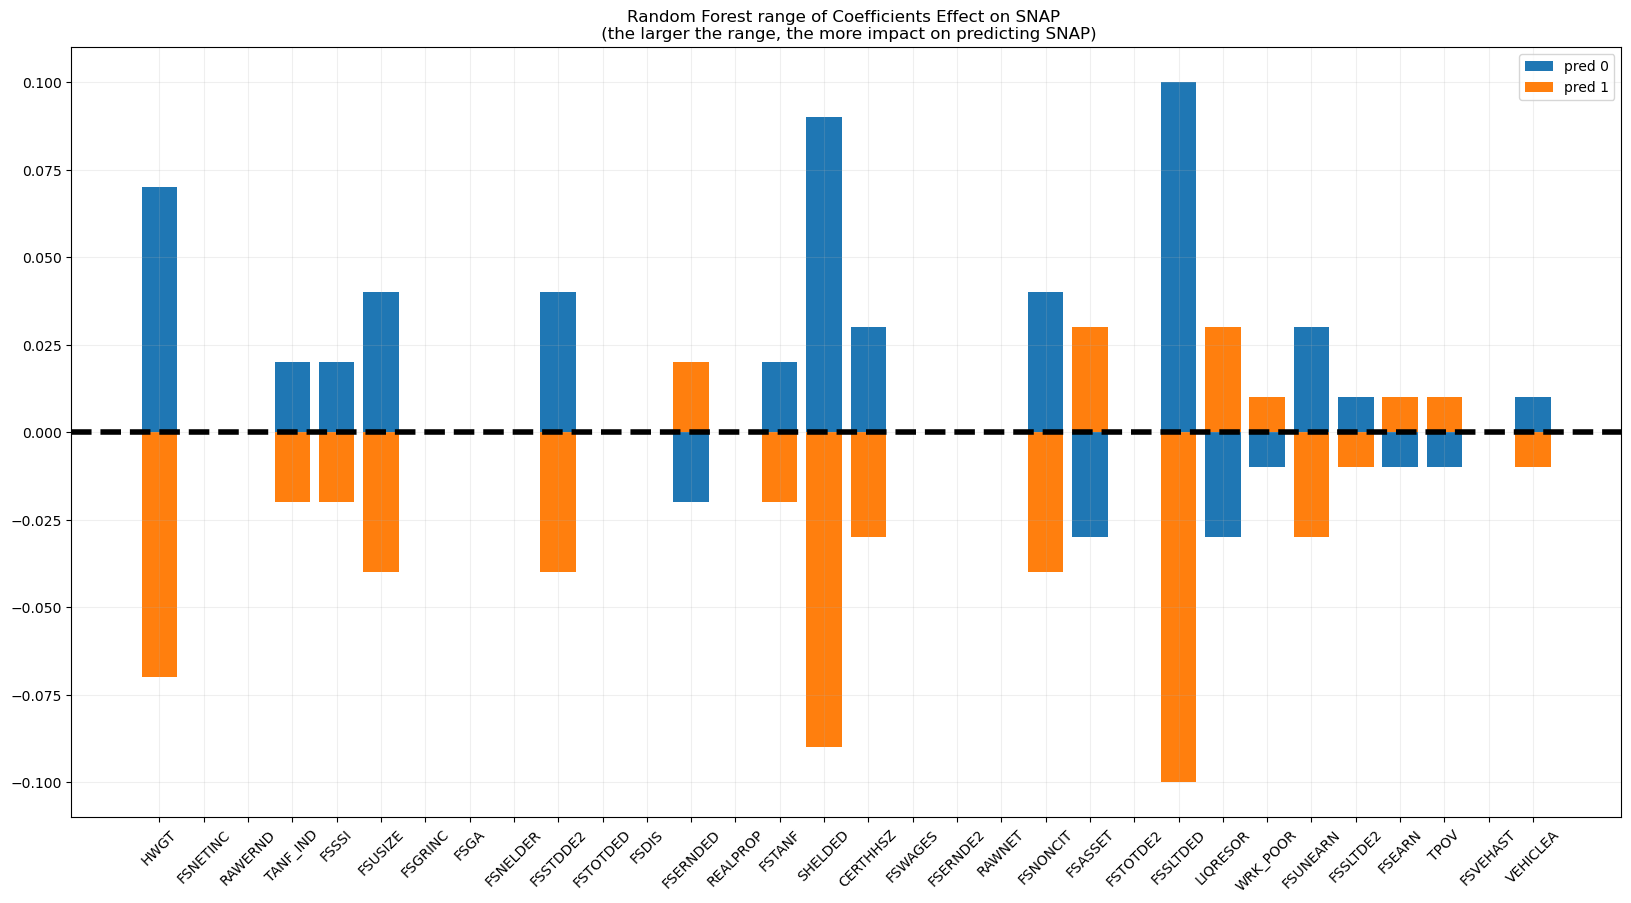

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Random Forest range of Coefficients Effect on SNAP \n (the larger the range, the more impact on predicting SNAP)')
plt.grid(zorder=0,alpha = 0.2)
xs = np.arange(len(labels))
ax.bar(xs,coef_df['pred_0'], label = 'pred 0')
ax.bar(xs,coef_df['pred_1'],label = 'pred 1')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.set_xticks(coef_df.index)
ax.set_xticklabels(coef_df['feature'],rotation = 45)
plt.legend()
plt.savefig('./images/rf_corr.png');

In [20]:
et = ExtraTreeClassifier()
params={'max_depth':[None,3,4],
       'max_features':[None,'auto'],
       'max_leaf_nodes':[5,10]}
et_gs = GridSearchCV(et,param_grid=params)
et_gs.fit(X_train,y_train)
print(et_gs.best_score_)
et_gs.best_params_

0.8513865172000454


C:\Users\pmanc\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pmanc\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pmanc\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\pmanc\A

{'max_depth': None, 'max_features': None, 'max_leaf_nodes': 10}

In [21]:
bag = BaggingClassifier()
bag.fit(X_train,y_train)
y_pred_train = bag.predict(X_train)
y_pred_test = bag.predict(X_test)
print(f'cross_val_train = {np.mean(cross_val_score(model,X_train_pc,y_train,cv=4))}')
print(f'cross_val_test = {np.mean(cross_val_score(model,X_test_pc,y_test,cv=4))}')
print(f'test_recall = {recall_score(y_test, y_pred_test)}')
print(f'test_precision = {precision_score(y_test, y_pred_test)}')

cross_val_train = 0.7269399707174231
cross_val_test = 0.7133105802047782
test_recall = 0.9435695538057742
test_precision = 0.9548472775564409


In [22]:
0.9509512425417362
{'bag__n_estimators': 10,
 'gb__max_depth': 10,
 'gb__subsample': 0.8,
 'rf__bootstrap': False,
 'rf__max_depth': None,
 'rf__n_estimators': 1000}

{'bag__n_estimators': 10,
 'gb__max_depth': 10,
 'gb__subsample': 0.8,
 'rf__bootstrap': False,
 'rf__max_depth': None,
 'rf__n_estimators': 1000}

In [23]:
vote = VotingClassifier([
    ('rf',RandomForestClassifier(bootstrap=False,n_estimators=1000)),
    ('gb',GradientBoostingClassifier(max_depth=10,subsample=0.8)),
    ('bag',BaggingClassifier(n_estimators = 10))
])

In [24]:
vote.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     n_estimators=1000)),
                             ('gb',
                              GradientBoostingClassifier(max_depth=10,
                                                         subsample=0.8)),
                             ('bag', BaggingClassifier())])

In [25]:
filename = 'final_model.sav'
pickle.dump(vote, open(filename, 'wb'))